In [2]:
import numpy as np
import scipy.io as sio
import os
import euGenFuncs as eu
import numpy as np
import pandas as pd
import pickle
import ieeg_funcs as ief
import dgFuncs as dg
import matplotlib.pyplot as plt
# %matplotlib inline
import imp 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


In [3]:
infname='/home/dgroppe/GIT/SZR_ANT/EU_GENERAL/train_ftrs_unbnded_se_dsamp500.npz'
se=np.load(infname)
print(se['ftrs'].shape)
print(se.keys())

# show_wind=np.arange(0,1000);
# plt.figure(1)
# plt.clf()
# plt.subplot(2,1,1)
# plt.boxplot(se['ftrs'][show_wind,:]);
# #plt.plot(se['ftrs'][show_wind,:].T);

# plt.subplot(2,1,2)
# plt.plot(se['szr_class'][show_wind]);

(742579, 30)
['ftrs', 'szr_class', 'sub_id', 'train_subs_list', 'bnded']


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(se['ftrs'])
# df['pca-one'] = pca_result[:,0]
# df['pca-two'] = pca_result[:,1] 
# df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Total explained variance: {}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [ 0.68248869  0.13420958  0.05913529]
Total explained variance: 0.8758335556112526


In [11]:
plt.figure(1)
plt.clf()
plt.plot(pca_result[:,2])

In [4]:
from sklearn.manifold import TSNE
n_sne = 100
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(se['ftrs'][:n_sne,:])

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.033139
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.113297
[t-SNE] Error after 300 iterations: 1.899809


In [5]:
tsne_results.shape

(100, 3)

<IPython.core.display.Javascript object>


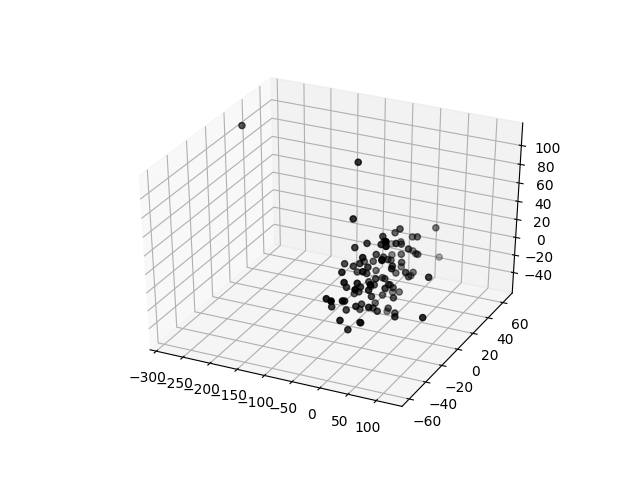

done


In [6]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_results[:,0], tsne_results[:,1], tsne_results[:,2],c='k')
print('done')

<IPython.core.display.Javascript object>


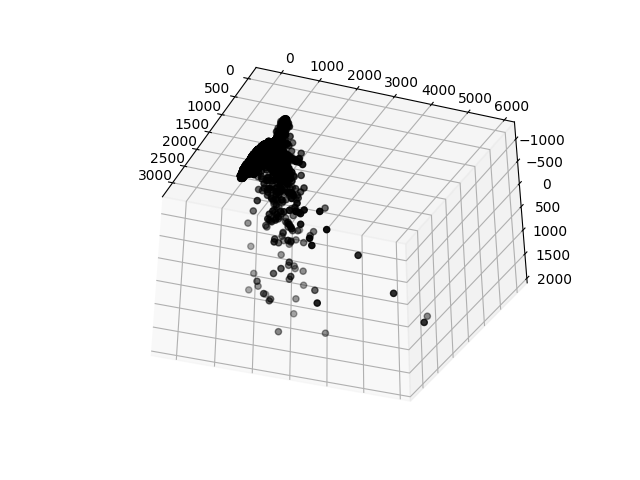

done


In [13]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:,2],c='k')
print('done')

In [6]:
pca_result.shape

(742579, 3)

<IPython.core.display.Javascript object>


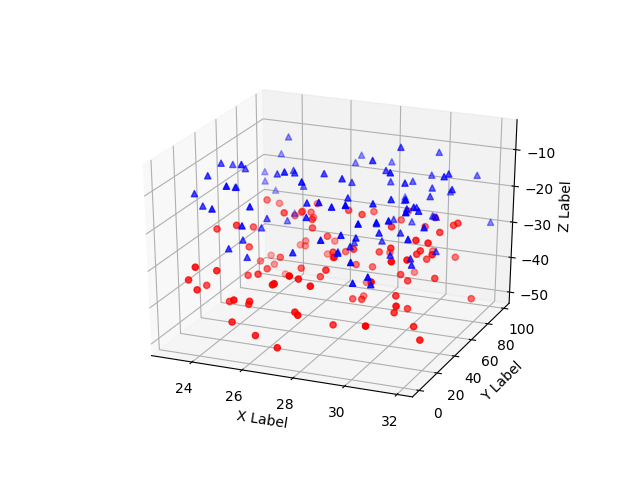

Text(0.5,0,'Z Label')

In [3]:


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
